<a href="https://colab.research.google.com/github/pds2021/a5-nicolasleip/blob/assigment_5/Sneaker_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install -Uqq fastai

     |████████████████████████████████| 194kB 8.1MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 


In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *


**Sneaker Classification**


Some sneaker models look very similar. Despite the similarity, their prices can vary widely. One example is the likelihood of confusion between the “Jordan 1 Low” and “Nike Dunk Low” models. With the help of this application it is possible to differentiate between the two models. So upload a picture of a shoe that you are not sure about and the model will classify it.

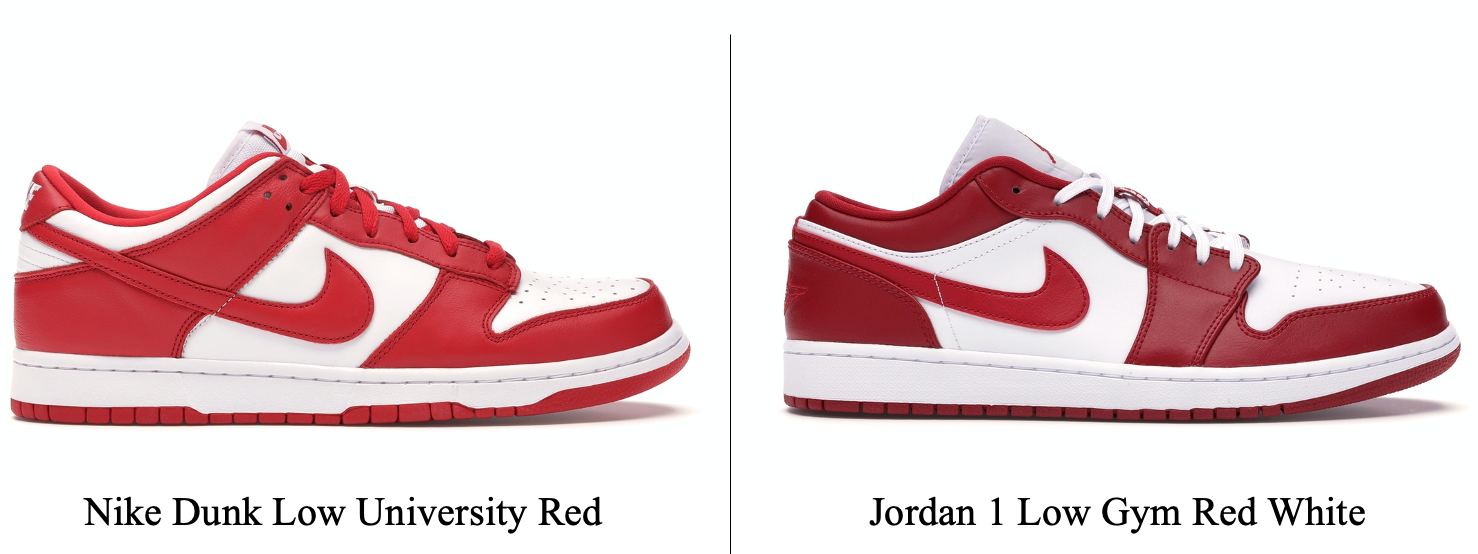


In [2]:
download_url('https://github.com/pds2021/a5-nicolasleip/releases/download/1.0/export.pkl', 'export.pkl')
learn_inf = load_learner('export.pkl', cpu=True)
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description="Classify")
out_pl = widgets.Output()
lbl_pred = widgets.Label()

def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(512,512))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)
VBox([widgets.Label("Select Sneaker Model (Jordan 1 Low / Nike Dunk Low)"),
     btn_upload, btn_run, out_pl, lbl_pred])